# EDA

This notebook performs the Exploratory Data Analysis (EDA) to understand the main characteristics of the dataset before transformations and modeling. 

It examines both categorical and numerical variables through descriptive statistics and visualizations, helping to detect patterns, trends, and potential data issues. 

The goal is to gain a clear understanding of the dataset’s behavior and prepare insights that will guide the following preprocessing and feature engineering stages.

## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Autocomplete
%config IPCompleter.greedy=True

## IMPORT DATASETS

In [2]:
project_path = '/Users/rober/retail-stockout-risk-scoring'

df_name = 'df_after_data_quality.pickle'
cat_name = 'cat_after_data_quality.pickle'
num_name = 'num_after_data_quality.pickle'

df = pd.read_pickle(project_path + '/02_Data/03_Working/' + df_name)
cat = pd.read_pickle(project_path + '/02_Data/03_Working/' + cat_name)
num = pd.read_pickle(project_path + '/02_Data/03_Working/' + num_name)

## EDA - CATEGORICAL

The dataset includes several categorical fields (store_id, product_id, category, region, weather, seasonality, holiday_promo).

All of them are clean, well-balanced, and contain no rare or inconsistent labels—expected for synthetic data.

Because the distributions are uniform and no data quality issues are present, no transformation or grouping is required at this stage.

These variables may be encoded later during the feature engineering phase.

## EDA - NUMERICAL

### Statistical analysis

In [3]:
def statistics(num):
    #describe
    statistics = num.describe().T
    #add median
    statistics['median'] = num.median()
    #reorder to put the median next to mean
    statistics = statistics.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(statistics)

In [4]:
statistics(num)

,count,mean,median,std,min,25%,50%,75%,max
inventory_level,20000.0,273.865800,273.000,129.335309,50.00,161.0000,273.000,386.00,500.00
units_sold,20000.0,136.686150,109.000,108.978637,0.00,48.0000,109.000,203.00,499.00
units_ordered,20000.0,110.018300,110.000,52.240277,20.00,65.0000,110.000,155.00,200.00
demand_forecast,20000.0,141.795762,114.400,109.259954,-9.67,53.7000,114.400,208.77,518.55
price,20000.0,55.033239,54.955,25.872395,10.00,32.7800,54.955,77.51,99.99
discount,20000.0,9.962250,10.000,7.114939,0.00,5.0000,10.000,15.00,20.00
competitor_pricing,20000.0,55.052326,54.795,26.016643,5.34,32.9275,54.795,77.50,104.91


### Análisis gráfico

In [5]:
def plot_eda_continuous(num):
    
    #calculate row number
    from math import ceil
    rows = ceil(num.shape[1] / 2)

    #define plot dimensions
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (16, rows * 6))

    #flat to iterate on the plot as it was 1 dimension instead of 2
    ax = ax.flat 

    #create the loop that adds each plot
    for each, variable in enumerate(num):
        num[variable].plot.density(ax = ax[each])
        ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[each].tick_params(labelsize = 12)

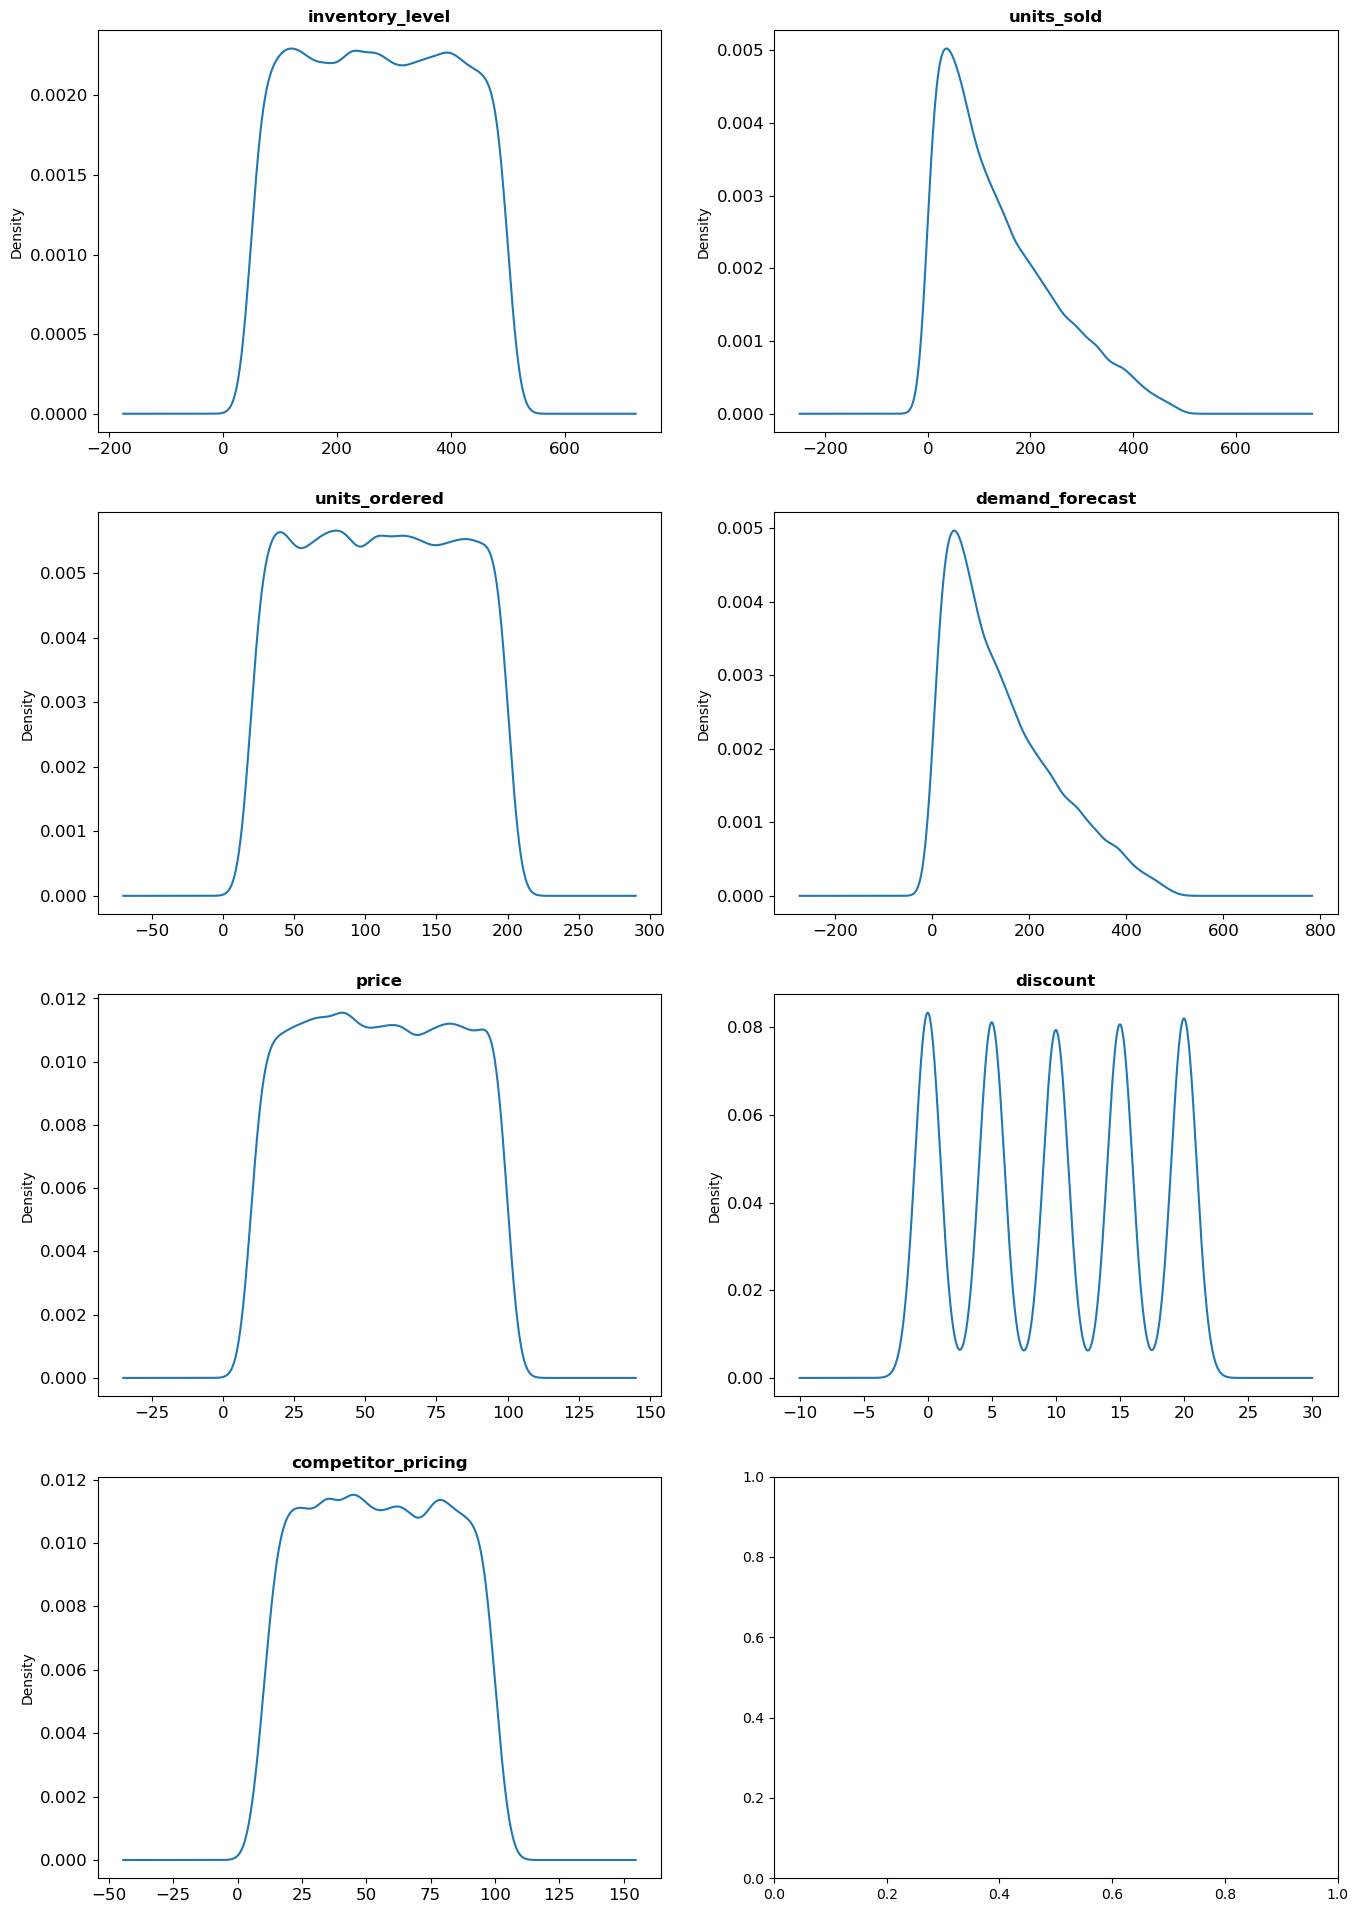

In [6]:
plot_eda_continuous(num)

#### Conclusions

- No missing values, no outliers, no corrupted data.
- Most variables are generated using uniform or controlled distributions
- Demand variables (units_sold, forecast) are the only ones showing natural retail patterns → Naturally right-skewed, ok
- No transformations required (log, winsorization, etc.). Numerical data is ready for modeling. 

Since inventory, price, competitor price, and replenishment quantities are almost uniformly distributed, they won’t provide strong predictive power by themselves.

The value will come from:

- their temporal behavior
- lags
- rolling windows
- depletion rate
- forecast errors
- promo interactions

**Feature engineering will be crucial**

##### About demand variables: 

Naturally right-skewed: Retail demand, sales, orders, always skewed. Most products sell little most days, just a few products sell a lot occasionally.

Transformations of distributions (Quantile Transformer, Yeo-Johnson...) are only needed when:
- The model is linear regression
- The variable affects the target in a multiplicative way
- Outliers distort the model
- You need normally-distributed errors

None of this applies here because: we will use **tree-based models and risk scoring (classification)**: trees do not require normality, skewness does not harm tree performance, and interpretation remains easier without transformations

## SAVE DATASETS AFTER EDA

We haven't changed anything, but we'll follow the path saving the archives with the sufix _eda just to flag we already finished EDA phase.

In [7]:
df_path = project_path + '/02_Data/03_Working/' + 'df_after_eda.pickle'
cat_path = project_path + '/02_Data/03_Working/' + 'cat_after_eda.pickle'
num_path = project_path + '/02_Data/03_Working/' + 'num_after_eda.pickle'

In [8]:
df.to_pickle(df_path)
cat.to_pickle(cat_path)
num.to_pickle(num_path)